In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [171]:
df_police = pd.read_csv("Police_Arrests_20240702.csv")
df_police.head()
#df_police.shape

,ID Reference Number,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Event Date/Time
0,1,Asian,Male,43,NON-HISPANIC,6.0,0,TOD,FSB,1/1/2021 1:07
1,2,Black/African American,Male,23,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
2,3,Black/African American,Male,18,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
3,4,Black/African American,Male,21,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52
4,5,White,Female,38,HISPANIC,4.0,0,TOD,FSB,1/1/2021 3:00


In [172]:
renames = {}
for colname in df_police:
    words = colname.lower().split(' ')
    if words[0] == 'id' or words[0] == "district" or words[0] == "ethnicity":
        renames[colname] = words[0]
    elif words[0] == "subject's" or words[0] == "assigned":
        renames[colname] = words[1]
    elif words[0] == 'event':
        words = [words[0]] + words[1].split("/")
        renames[colname] = "_".join(words)
    else:
        renames[colname] = "_".join(words)
df_police.rename(columns=renames, inplace=True)

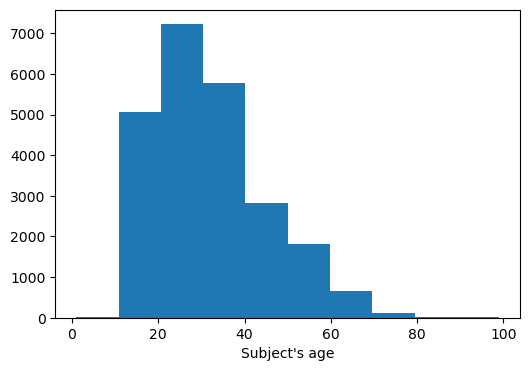

In [3]:
fig, ax = plt.subplots(figsize = (6,4))
ax.hist(df_police["Subject's age"])
ax.set_xlabel("Subject's age")
plt.show()

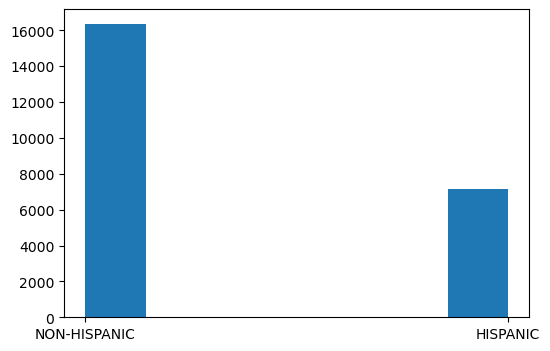

Ethnicity
NON-HISPANIC    0.695789
HISPANIC        0.304211
Name: proportion, dtype: float64

In [4]:
fig, ax = plt.subplots(figsize = (6,4))
ax.hist(df_police["Ethnicity"], bins = 7)
plt.show()
df_police["Ethnicity"].value_counts(normalize=True)

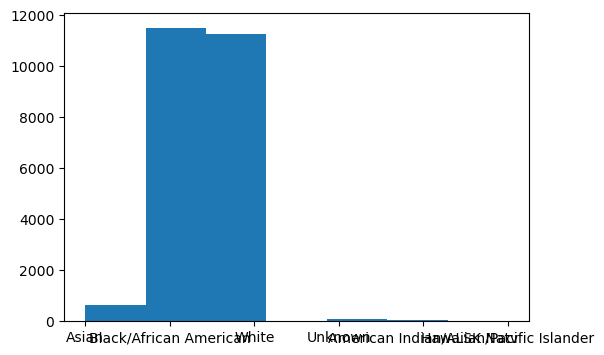

Subject's race
Black/African American       0.488941
White                        0.478775
Asian                        0.026882
Unknown                      0.003020
American Indian/ALSK Natv    0.001531
Hawaiian/Pacific Islander    0.000851
Name: proportion, dtype: float64

In [4]:
fig, ax = plt.subplots(figsize = (6,4))
ax.hist(df_police["Subject's race"], bins = 7)
plt.show()
df_police["Subject's race"].value_counts(normalize=True)

In [5]:
df_police["Subject's age"].quantile([.0, 0.001, 0.25, .5, 0.75, .9, .99, 0.999, 1])


0.000     1.0
0.001    11.0
0.250    22.0
0.500    30.0
0.750    39.0
0.900    51.0
0.990    67.0
0.999    79.0
1.000    99.0
Name: Subject's age, dtype: float64

In [6]:
df_police["Subject's age"].sort_values(ascending=False).head(10)

21334    99
15903    99
2966     99
13022    99
2023     99
20261    99
6579     99
23334    99
20450    86
18119    85
Name: Subject's age, dtype: int64

In [7]:
df_police['District of occurrence'].value_counts()

District of occurrence
3.0    4782
6.0    4748
4.0    4563
5.0    3820
1.0    2513
2.0    2196
8.0     786
Name: count, dtype: int64

In [8]:
df_police['ID_number'] = df_police['ID Reference Number ']
df_police.head()

,ID Reference Number,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Event Date/Time,ID_number
0,1,Asian,Male,43,NON-HISPANIC,6.0,0,TOD,FSB,1/1/2021 1:07,1
1,2,Black/African American,Male,23,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52,2
2,3,Black/African American,Male,18,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52,3
3,4,Black/African American,Male,21,NON-HISPANIC,1.0,0,RCPD,NaN,1/1/2021 0:52,4
4,5,White,Female,38,HISPANIC,4.0,0,TOD,FSB,1/1/2021 3:00,5


In [173]:
df_police["Event Date/Time"] = pd.to_datetime(df_police['event_date_time'])
df_police["Year"] = df_police["Event Date/Time"].dt.year
df_police["Month"] = df_police["Event Date/Time"].dt.month
df_police["weekday"] = df_police["Event Date/Time"].dt.dayofweek


In [174]:
df_police["Event Date/Time"] = pd.to_datetime(df_police['Event Date/Time'])
df_police["Year"] = df_police["Event Date/Time"].dt.year
df_police["Year"].value_counts()


Year
2023    7353
2022    6735
2021    5885
2024    3537
Name: count, dtype: int64

In [175]:
df_police["Month"] = df_police["Event Date/Time"].dt.month
df_police["Month"].value_counts()

Month
3     2452
5     2352
4     2148
1     2134
2     2095
6     2039
12    1906
11    1808
8     1695
9     1656
10    1621
7     1604
Name: count, dtype: int64

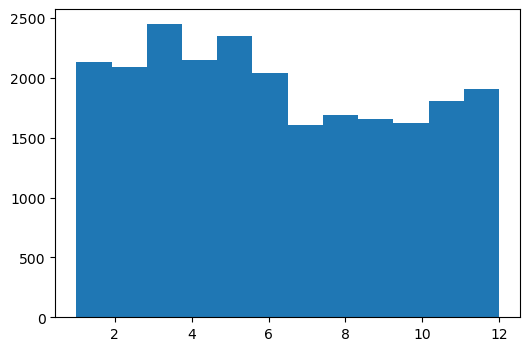

In [176]:
fig, ax = plt.subplots(figsize = (6,4))
ax.hist(df_police["Month"], bins = 12)
plt.show()

In [13]:
#df_police['Month'].groupby(df_police['Year']).value_counts()
df_police['Month'][df_police['Year'] == 2021]

0         1
1         1
2         1
3         1
4         1
         ..
15604     6
16733    12
17422    10
19682     6
22601    11
Name: Month, Length: 5885, dtype: int32

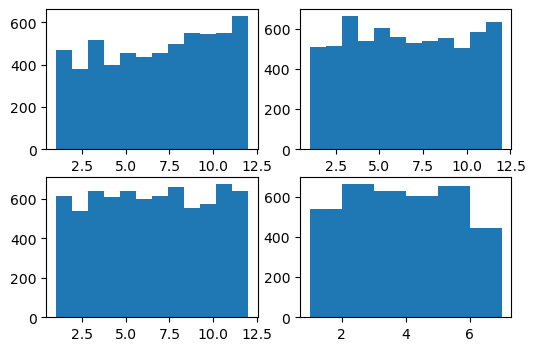

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6,4))  # make one subplot (ax) on the figure
axes = axes.flatten() # it comes out as a 2D matrix; convert to a vector

axes[0].hist(df_police['Month'][df_police['Year'] == 2021], bins = 12)
axes[1].hist(df_police['Month'][df_police['Year'] == 2022], bins = 12)
axes[2].hist(df_police['Month'][df_police['Year'] == 2023], bins = 12)
axes[3].hist(df_police['Month'][df_police['Year'] == 2024], bins = 6)

plt.show()

In [15]:
df_police[df_police["Subject's age"] > 86 ]

,ID Reference Number,Subject's race,Subject's gender,Subject's age,Ethnicity,District of occurrence,Adjacent to School,Assigned Division,Assigned Bureau,Event Date/Time,ID_number,Year,Month,weekday
2023,2024,White,Female,99,NON-HISPANIC,1.0,0,RCPD,NaN,2021-05-21 21:32:00,2024,2021,5,4
2966,2967,White,Female,99,NON-HISPANIC,6.0,0,6D,PSB,2021-07-26 15:32:00,2967,2021,7,0
6579,6580,White,Male,99,HISPANIC,6.0,0,GPD,NaN,2022-02-17 00:40:00,6580,2022,2,3
13022,13023,Black/African American,Male,99,NON-HISPANIC,5.0,0,5D,PSB,2023-01-26 16:24:00,13023,2023,1,3
15903,15904,White,Male,99,NON-HISPANIC,1.0,0,RCPD,NaN,2023-06-17 12:45:00,15904,2023,6,5
20261,20262,White,Female,99,HISPANIC,3.0,0,3D,PSB,2024-01-22 19:33:00,20262,2024,1,0
21334,21335,Asian,Female,99,NON-HISPANIC,4.0,1,CED,FSB,2024-03-11 10:15:00,21335,2024,3,0
23334,23335,Black/African American,Male,99,NON-HISPANIC,5.0,0,5D,PSB,2024-02-24 00:00:00,23335,2024,2,5


In [16]:
df_police["weekday"] = df_police["Event Date/Time"].dt.dayofweek
df_police["weekday"]

0        4
1        4
2        4
3        4
4        4
        ..
23505    6
23506    0
23507    5
23508    5
23509    0
Name: weekday, Length: 23510, dtype: int32

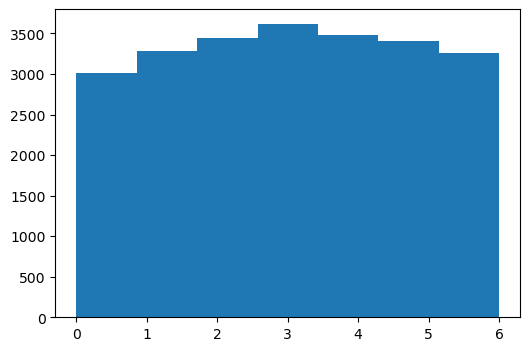

In [17]:
fig, ax = plt.subplots(figsize = (6,4))
ax.hist(df_police["weekday"], bins = 7)
plt.show()

In [18]:
df_police['hour']= df_police["Event Date/Time"].dt.hour

df_police['hour'].value_counts

<bound method IndexOpsMixin.value_counts of 0         1
1         0
2         0
3         0
4         3
         ..
23505    11
23506     7
23507     2
23508     2
23509    16
Name: hour, Length: 23510, dtype: int32>

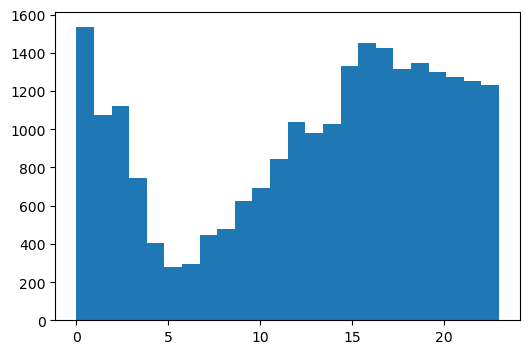

In [20]:
fig, ax = plt.subplots(figsize = (6,4))
ax.hist(df_police["hour"], bins = 24)
plt.show()

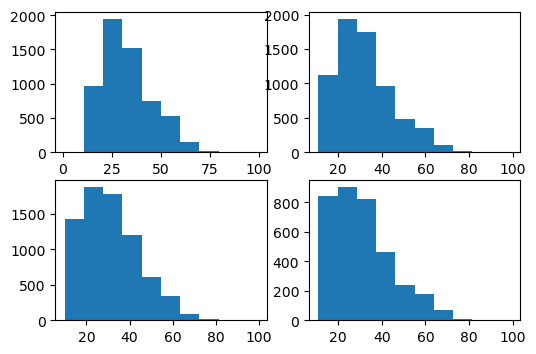

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6,4))  
axes = axes.flatten()

axes[0].hist(df_police["Subject's age"][df_police['Year'] == 2021])
axes[1].hist(df_police["Subject's age"][df_police['Year'] == 2022])
axes[2].hist(df_police["Subject's age"][df_police['Year'] == 2023])
axes[3].hist(df_police["Subject's age"][df_police['Year'] == 2024])

plt.show()

In [35]:
month_names = {1: 'January',
               2: 'February',
               3: 'March',
               4: 'April',
               5: 'May',
               6: 'June',
               7: 'July',
               8: 'August',
               9: 'September',
               10: 'October',
               11: 'November',
               12: 'December'}

weekday_names = {0: 'Monday',
                 1: 'Tuesday',
                 2: 'Wednesday',
                 3: 'Thursday',
                 4: 'Friday',
                 5: 'Saturday',
                 6: 'Sunday'}

In [71]:
unq_bur = pd.Series(df_police['bureau'].unique())

bureau_colors = ['red', 'blue', 'green', 'purple', 'orange']

cols_mp = df_police['bureau'].map(cols)
bureau_colors = []
for i in range(len(df_police['bureau'])):
    if df_police['bureau'][i] == 'FSB':
        bureau_colors.append('red')
    elif df_police['bureau'][i] == 'PSB':
        bureau_colors.append('blue')
    elif df_police['bureau'][i] == 'MSB':
        bureau_colors.append('green')
    elif df_police['bureau'][i] == 'ISB':
        bureau_colors.append('purple')
    else:
        bureau_colors.append('orange')



0    FSB
1    NaN
2    PSB
3    MSB
4    ISB
dtype: object

In [106]:
df_police['race'].value_counts().sort_index()

race
American Indian/ALSK Natv       36
Asian                          632
Black/African American       11495
Hawaiian/Pacific Islander       20
Unknown                         71
White                        11256
Name: count, dtype: int64

In [229]:
x = ['FSB', 'PSB', 'MSB', 'ISB']

b_af = df_police['bureau'][df_police['race'] == 'Black/African American'].value_counts().reindex(x, fill_value=0)
white = df_police['bureau'][df_police['race'] == 'White'].value_counts().reindex(x, fill_value=0)
asian = df_police['bureau'][df_police['race'] == 'Asian'].value_counts().reindex(x, fill_value=0)
unknown = df_police['bureau'][df_police['race'] == 'Unknown'].value_counts().reindex(x, fill_value=0)
ai_an = df_police['bureau'][df_police['race'] == 'American Indian/ALSK Natv'].value_counts().reindex(x, fill_value=0)
h_pi = df_police['bureau'][df_police['race'] == 'Hawaiian/Pacific Islander'].value_counts().reindex(x, fill_value=0)
df_police["bureau"].value_counts()


bureau
PSB    16309
FSB     1405
ISB      655
MSB      482
Name: count, dtype: int64

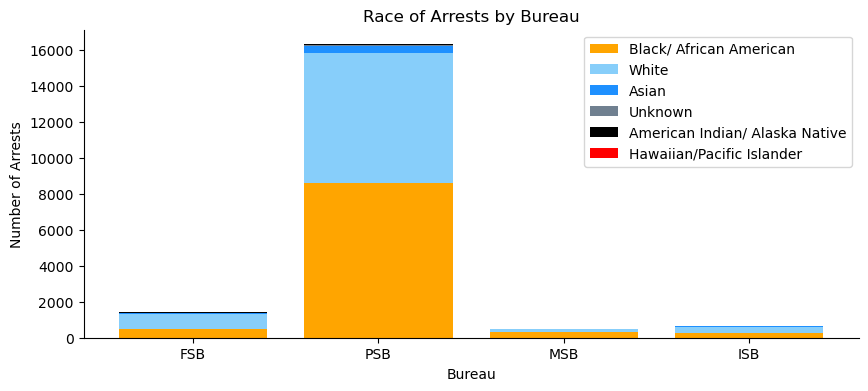

In [236]:
fig, ax = plt.subplots(figsize = (10,4))
#ax.barh(df_police["age"], df_police["weekday"], color = bureau_colors)
#x = ['FSB', 'PSB', 'MSB', 'ISB', np.nan]
x = range(1,5)
ax.bar(x, b_af,  width=0.8, label="Black/ African American", color='orange')
ax.bar(x,  white,  bottom = b_af, width=0.8, label="White", color='lightskyblue')
ax.bar(x, asian, bottom = white + b_af, width=0.8, label="Asian", color='dodgerblue')
ax.bar(x, unknown, bottom = white + b_af + asian, width=0.8, label="Unknown", color='slategrey')
ax.bar(x, ai_an, bottom = white + b_af + asian + unknown, width=0.8, label="American Indian/ Alaska Native", color='black')
ax.bar(x, h_pi, bottom = white + b_af + asian + unknown + ai_an, width=0.8, label="Hawaiian/Pacific Islander", color='red')

ax.set_xticks(x)
ax.set_xticklabels(['FSB', 'PSB', 'MSB', 'ISB'])
ax.set_xlabel('Bureau')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel("Number of Arrests")
ax.set_title('Race of Arrests by Bureau')

plt.legend()
plt.show()

In [219]:
df_more = df_police.groupby('weekday').agg({'age':['mean', 'min', 'max']})
df_more.columns = df_more.columns.droplevel(0)
df_more

,mean,min,max
weekday,,,
0,31.008976,10,99
1,31.113380,10,83
2,31.410792,11,80
3,32.134918,11,99
4,31.719736,1,99
5,32.802523,11,99
6,32.392890,11,85


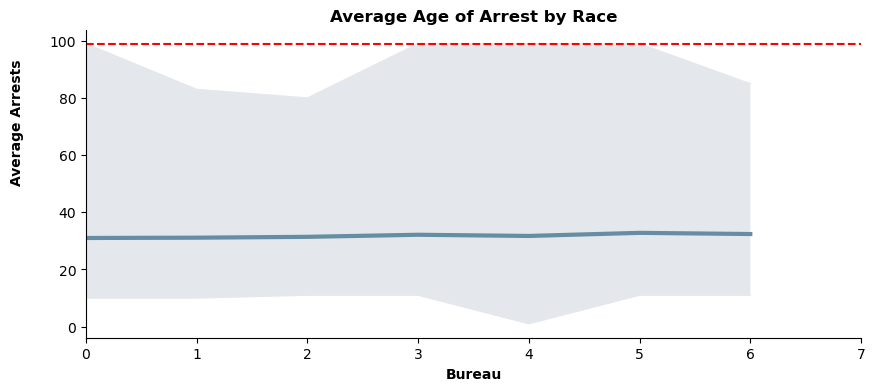

In [222]:
#make the plot bigger
fig, ax = plt.subplots(figsize=(10,4))

#change the color and size of the line. Note here the size of a line is lw(line width)
ax.plot(df_more['mean'], c='#658da3', lw=3)

#add min and max
ax.plot(df_more.index, df_more['min'], c='#e4e7eb', lw=1)
ax.plot(df_more.index, df_more['max'], c='#e4e7eb', lw=1)

#fill between min and max
ax.fill_between(df_more.index,df_more['min'], df_more['max'],facecolor='#e4e7eb')

# #add reference text
# ax.text(len(df_more)+0.05, 31, "MIN",
#         horizontalalignment='right', fontsize=11, c='#e4e7eb', weight='bold')
# ax.text(len(df_more)+0.05, 186, "MAX",
#         horizontalalignment='right', fontsize=11, c='#e4e7eb', weight='bold')
# ax.text(len(df_more)+0.05, 100, "AVG",
#         horizontalalignment='right', fontsize=11, c='#658da3', weight='bold')


#set xtick positions
#ax.set_xticks(position)
#set xtick labels
#ax.set_xticklabels(label)

#set y label
ax.set_xlim(0, 7)
ax.set_xlabel('Bureau', weight = 'bold')
ax.set_ylabel('Average Arrests', weight = 'bold')
#set y label position
ax.yaxis.set_label_coords(-0.08, 0.7)

#set title
ax.set_title("Average Age of Arrest by Race", weight = 'bold')
ax.hlines(99, 0, 8, colors='red', linestyles='dashed')
#hide the frames, only show x and y axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

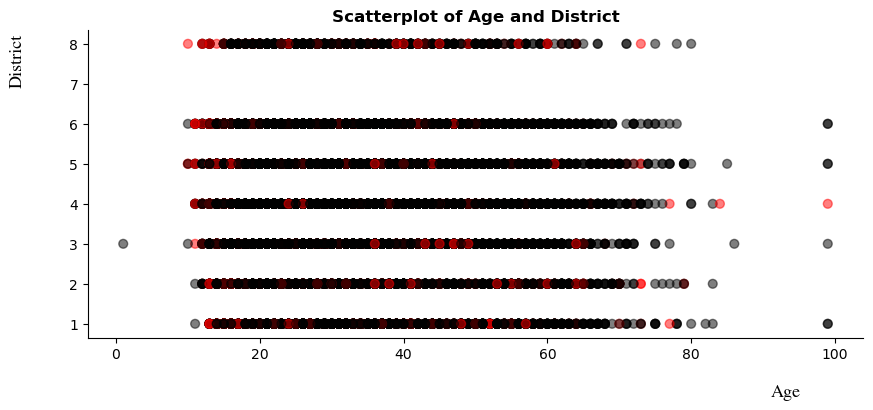

In [291]:
#my = df_cars['MPG'].mean()
#mx = df_cars['WGT'].mean()

#Add color scheme by condition: if MPG<mean, '#E2E5EA', ow '#E15F32'
col = np.where(df_police['adjacent_to_school'] == 1, 'red', 'black')

#Draw scatter plot, use col as our color scheme
fig, ax = plt.subplots(figsize=(10,4))
ax.scatter(df_police['age'], df_police['district'], c=col, s=40, alpha=0.5)

#Add horizontal line to indicate mean MPG
#wgt=d['WGT']
#ax.hlines(y=5, xmin=wgt.min(), xmax=wgt.max(), 
          #colors='#5779AD', linestyles='dashed', lw=1.5, label='Average MPG')

#Add the a reference point to indicate mean MPG and mean WGT
#ax.scatter(mx, my, c='#5779AD', s=60) #plot the point
#Add text
#ax.annotate('Average', (mx+150, my+1), c='#5779AD', size=12, weight='bold') 

#Show legend for the label of the line

ax.set_xlabel("Age",fontsize=13, fontname="Times")
ax.set_ylabel("District",fontsize=13, fontname="Times")
ax.set_title("Scatterplot of Age and District", weight = 'bold')

ax.xaxis.set_label_coords(0.9, -0.15) 
ax.yaxis.set_label_coords(-0.08, 0.9)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

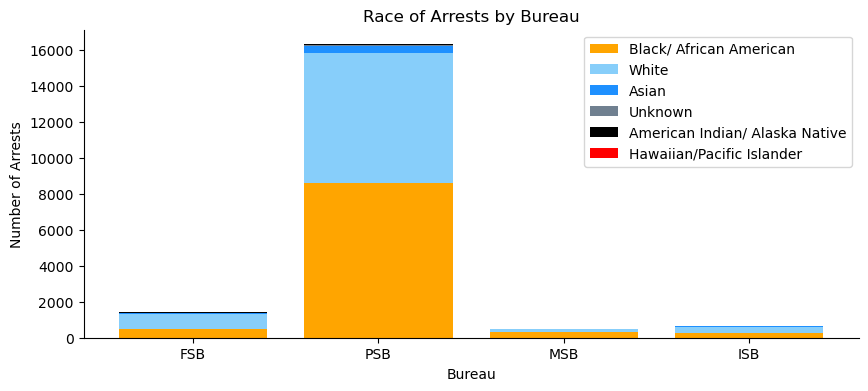

In [290]:
fig, ax = plt.subplots(figsize = (10,4))

x = range(1,5)
ax.bar(x, b_af,  width=0.8, label="Black/ African American", color='orange')
ax.bar(x,  white,  bottom = b_af, width=0.8, label="White", color='lightskyblue')
ax.bar(x, asian, bottom = white + b_af, width=0.8, label="Asian", color='dodgerblue')
ax.bar(x, unknown, bottom = white + b_af + asian, width=0.8, label="Unknown", color='slategrey')
ax.bar(x, ai_an, bottom = white + b_af + asian + unknown, width=0.8, label="American Indian/ Alaska Native", color='black')
ax.bar(x, h_pi, bottom = white + b_af + asian + unknown + ai_an, width=0.8, label="Hawaiian/Pacific Islander", color='red')

ax.set_xticks(x)
ax.set_xticklabels(['FSB', 'PSB', 'MSB', 'ISB'])
ax.set_xlabel('Bureau')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel("Number of Arrests")
ax.set_title('Race of Arrests by Bureau')

plt.legend()
plt.show()

In [344]:
df_police['division'].value_counts()
ages_fr_top_divs = pd.Series(df_police.groupby('division')['age'].mean())
sorted_ages_divs = ages_fr_top_divs.sort_index(ascending=True)

x = pd.Series(df_police['division'].unique())
x
ages_fr_top_divs


division
1D      33.062635
2D      32.837968
3D      31.142923
4D      31.614125
5D      33.238721
6D      30.796716
CED     16.855956
CID     32.662162
FSB     45.250000
GPD     32.126040
IMTD    23.149028
ISB     33.000000
MCD     27.040000
MCFM    31.000000
MCSO    31.631579
PERS    43.000000
PSCC    21.000000
PSTA    29.294118
RCPD    33.132605
SID     33.456693
SOD     28.142857
SVID    34.779116
TOD     34.905131
TPPD    32.438619
Name: age, dtype: float64

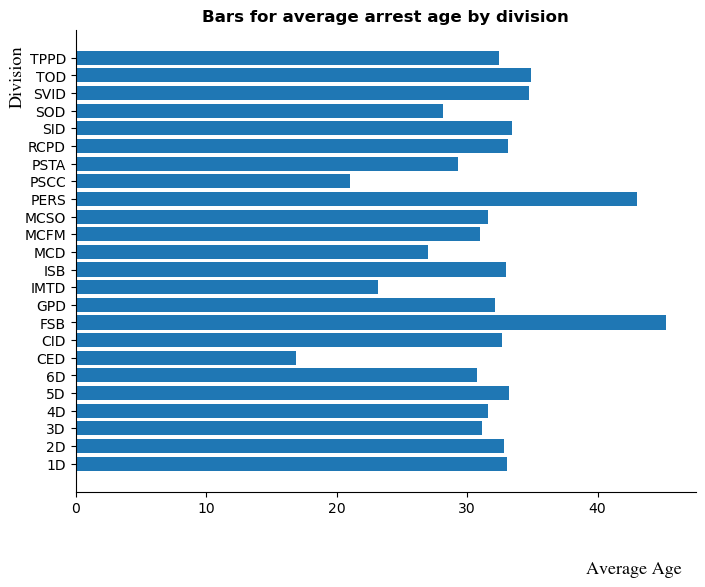

In [345]:
fig, ax = plt.subplots(figsize=(8,6))
ax.barh(sorted_ages_divs.index, sorted_ages_divs)

ax.set_xlabel("Average Age",fontsize=13, fontname="Times")
ax.set_ylabel("Division",fontsize=13, fontname="Times")
ax.set_title("Bars for average arrest age by division", weight = 'bold')

ax.xaxis.set_label_coords(0.9, -0.15) 
ax.yaxis.set_label_coords(-0.08, 0.9)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()